# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

##### Excercise 1
Use the adult.csv dataset and run the codes shown in the following Screenshots. Then answer the questions.

In [83]:
import pandas as pd
import numpy as np
adult_df = pd.read_csv('adult.csv')
adult_df.set_index(np.arange(10000,42561),inplace=True)

print(adult_df.iloc[5:7,0:2])

print('\n')

print(adult_df.loc['10005':'10007','age':'fnlwgt'])

       age workclass
10005   37   Private
10006   49   Private


       age         workclass  fnlwgt
10005   37           Private  284582
10006   49           Private  160187
10007   52  Self-emp-not-inc  209642


In [84]:
adult_df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
10000,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


    a) Use the output to answer what is the difference in the behavior of .loc and .iloc when it comes to slicing.
    b)	Without running but by only looking at the data, what will be the output of adult_df.loc['10000':'10003', 'relationship':'sex'].
    c)	Without running but by only looking at the data, what will be the output of adult_df.iloc[0:3, 7:9].


-------
a) iloc slices before the end index, loc slices include the end index  
b) The output will have observations for 10000,10001,10002, and 10003 with the columns 'relationship', 'race', and 'sex'  
c) The output will have observations for 10000,10001, and 10002 and columns for  'relationship' and 'race'

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

In [85]:
adult_df.loc['10000':'10003', 'relationship':'sex']

,relationship,race,sex
10000,Not-in-family,White,Male
10001,Husband,White,Male
10002,Not-in-family,White,Male
10003,Husband,Black,Male


In [86]:
adult_df.iloc[0:3, 7:9]

,relationship,race
10000,Not-in-family,White
10001,Husband,White
10002,Not-in-family,White


##### Excercise 2 

For adult_df use the .groupby() function to run the following code and create the multi-index Series mlt_sr.

In [116]:
import pandas as pd

adult_df = pd.read_csv('adult.csv')
mlt_seris =adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     109018.626168
                            >50K      148012.000000
                    Male    <=50K     126428.767857
                            >50K      120721.541667
Asian-Pac-Islander  Female  <=50K     148165.333333
                            >50K      142426.093023
                    Male    <=50K     163885.130435
                            >50K      170698.347639
Black               Female  <=50K     213411.580205
                            >50K      205806.033333
                    Male    <=50K     242343.990566
                            >50K      245390.356902
Other               Female  <=50K     173235.932039
                            >50K      160223.333333
                    Male    <=50K     214891.832168
                            >50K      204551.736842
White               Female  <=50K     183485.120961
                            >50K      184030.255837
                    Male    <

Now that you have created a multi-index Series, run the following codes, study the outputs, and answer the questions.

    a)	Run the code below first and then answer the following. When we use .iloc[] for a multi-index Series or DataFrame, what we should expect?

In [88]:
print(mlt_seris.iloc[0])
print(mlt_seris.iloc[1])
print(mlt_seris.iloc[2])

109018.6261682243
148012.0
126428.76785714286


Answer: 

----
iloc will ignore the indexes, return the row by numerical index

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

    b)	Run the code below first and then answer the following. When we use .loc[] to access the data of one of the inner most index level of multi-index Series, what should we expect?

In [89]:
mlt_seris.loc['Other']

sex     income
Female  <=50K     173235.932039
        >50K      160223.333333
Male    <=50K     214891.832168
        >50K      204551.736842
Name: fnlwgt, dtype: float64

Answer: 

----
the retured data will be contain the indexes that are below the specified inder along with the values.

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

    c)	 Run the codes below first and then answer the following. When we use .loc[] to access the data of one of non inner most index level of multi-index Series, what should we expect? 

    When you run either line of code below, you will get an error and that is the point of this question. Study the error and try to answer the question. 

In [117]:
# mlt_seris.loc['Female']


In [118]:

# mlt_seris.loc['<=50K']

Answer: 

-----
The indexes that were specified for the slice are too deep in the tree. There is no index "Female" or "<=50k" value in the race column.

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

    d)	Run the codes below first and then answer the following. How is using .loc[] or .iloc[] different when working with a multi-index Series or a DataFrame?


In [92]:
print(mlt_seris.loc['Other']['Female']['<=50K'])
print(mlt_seris.iloc[12])

173235.93203883496
173235.93203883496


Answer: 

----
iloc works by numerical index, so it doesn't need the full path specified to get the value.

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.

In [93]:
billboard_df = pd.read_csv('billboard.csv')
billboard_df.head()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w67,w68,w69,w70,w71,w72,w73,w74,w75,w76
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    a)	Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them. 

In [94]:
billboard_df.describe()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w67,w68,w69,w70,w71,w72,w73,w74,w75,w76
count,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,24.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,40.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,69.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Based on the wording of the question, this is how I would answer
dropped_df = billboard_df.dropna(axis='columns', how='all')
dropped_df.head()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w56,w57,w58,w59,w60,w61,w62,w63,w64,w65
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Based on the material covered in the chapter, I think this is what 
# the author was looking for
billboard_df = billboard_df.loc[:, billboard_df.count() > 0]
billboard_df.head()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w56,w57,w58,w59,w60,w61,w62,w63,w64,w65
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    b)	With a for loop, draw and study the values in each of the remaining W columns.

In [97]:
# it isn't clear what "draw" means, so here is just some code to 
# see how many songs were in the first place during each of the weeks.
for col in billboard_df.columns:
    if col.startswith('w'):
        col_series = billboard_df.loc[:, col].value_counts()
        col_series.sort_index(inplace=True)
        one_cnt = col_series.get(1)
        num_songs_at_top = one_cnt if one_cnt is not None else 0
        is_plural = ''
        if num_songs_at_top != 1:
            is_plural = 's'
        print(f"{col} had {num_songs_at_top} song{is_plural} at the top of the charts.")

w1 had 0 songs at the top of the charts.
w2 had 0 songs at the top of the charts.
w3 had 0 songs at the top of the charts.
w4 had 0 songs at the top of the charts.
w5 had 0 songs at the top of the charts.
w6 had 1 song at the top of the charts.
w7 had 1 song at the top of the charts.
w8 had 3 songs at the top of the charts.
w9 had 5 songs at the top of the charts.
w10 had 2 songs at the top of the charts.
w11 had 5 songs at the top of the charts.
w12 had 4 songs at the top of the charts.
w13 had 8 songs at the top of the charts.
w14 had 7 songs at the top of the charts.
w15 had 5 songs at the top of the charts.
w16 had 3 songs at the top of the charts.
w17 had 3 songs at the top of the charts.
w18 had 2 songs at the top of the charts.
w19 had 2 songs at the top of the charts.
w20 had 0 songs at the top of the charts.
w21 had 0 songs at the top of the charts.
w22 had 0 songs at the top of the charts.
w23 had 0 songs at the top of the charts.
w24 had 0 songs at the top of the charts.
w25

    c)	The dataset is in wide format, use an appropriate function to switch to a long fromat, and name the melted dataframe mlt_df.

In [98]:
billboard_df.head()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w56,w57,w58,w59,w60,w61,w62,w63,w64,w65
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
mlt_df = billboard_df.melt(id_vars = ['artist', 'track', 'time', 'date_e'], 
                value_vars=[col for col in billboard_df.columns if col.startswith('w')],
                var_name='week', 
                value_name='position')
mlt_df.dropna(inplace=True)
mlt_df.head()

,artist,track,time,date_e,week,position
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,w1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,w1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,w1,71.0
3,Madonna,Music,3:45,2000-08-12,w1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,w1,57.0


    d)	Write a code that shows mlt_df‘s every 1200 rows.

In [121]:
mlt_df.iloc[::1200]

,artist,track,time,date_e,week,position
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,w1,78.0
1218,"McKnight, Brian",Stay Or Let It Go,4:32,2000-02-26,w4,78.0
2600,Third Eye Blind,Never Let You Go,3:57,2000-01-22,w9,19.0
4225,Da Brat,What'Chu Like,3:57,2000-06-03,w14,39.0
6663,Destiny's Child,Say My Name,4:31,1999-12-25,w22,7.0


    e)	Run the following code first and answer the question. Could you have done this by using Boolean masking too?

In [122]:
mlt_df.query('artist == "Spears, Britney"')

,artist,track,time,date_e,week,position
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
63,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w1,76.0
93,"Spears, Britney",Lucky,3:23,2000-08-12,w1,61.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
380,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w2,59.0
410,"Spears, Britney",Lucky,3:23,2000-08-12,w2,41.0
685,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w3,26.0
697,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w3,52.0
727,"Spears, Britney",Lucky,3:23,2000-08-12,w3,28.0
1002,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w4,19.0


Could have done this by using Boolean masking too?

Answer:

In [123]:
# Yes, it is my preferred way, but query method isn't wrong.
mlt_df.loc[mlt_df.artist == 'Spears, Britney']

,artist,track,time,date_e,week,position
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
63,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w1,76.0
93,"Spears, Britney",Lucky,3:23,2000-08-12,w1,61.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
380,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w2,59.0
410,"Spears, Britney",Lucky,3:23,2000-08-12,w2,41.0
685,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w3,26.0
697,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w3,52.0
727,"Spears, Britney",Lucky,3:23,2000-08-12,w3,28.0
1002,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w4,19.0


    f)	 Use either the approach in e or the Boolean mask, to extract all the unique songs that Britney Spears has in this dataset.

In [124]:
mlt_df.loc[mlt_df.artist == 'Spears, Britney', 'track'].unique()

array(['Oops!.. I Did It Again', 'From The Bottom Of My Broken Heart',
       'Lucky'], dtype=object)

    g)	In mlt_df show all of the weeks that the song “Oops!.. I Did It Again” was on the top-100

In [125]:
# Using slicing:
mlt_df.loc[
    (mlt_df.artist == 'Spears, Britney') & 
    (mlt_df.track == 'Oops!.. I Did It Again') & 
    (mlt_df.position <= 100)
    ].week

51       w1
368      w2
685      w3
1002     w4
1319     w5
1636     w6
1953     w7
2270     w8
2587     w9
2904    w10
3221    w11
3538    w12
3855    w13
4172    w14
4489    w15
4806    w16
5123    w17
5440    w18
5757    w19
6074    w20
Name: week, dtype: object

In [105]:
# Using query:
mlt_df.query('artist == "Spears, Britney" & track == "Oops!.. I Did It Again" & position <= 100').week

51       w1
368      w2
685      w3
1002     w4
1319     w5
1636     w6
1953     w7
2270     w8
2587     w9
2904    w10
3221    w11
3538    w12
3855    w13
4172    w14
4489    w15
4806    w16
5123    w17
5440    w18
5757    w19
6074    w20
Name: week, dtype: object

##### Excercise 4 

We will use LaqnData.csv for this exercise. Each row of this dataset shows an hourly measurement recording of one of the five following air pollutants: NO, NO2, NOX, PM10, and PM2.5. The data was collected in a location in Londan for the entirety of year 2017. Read the data using Pandas and perform the following tasks.

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

air_df = pd.read_csv('LaqnData.csv')
air_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


    a)	The dataset has 6 columns. Three of them, naming ‘Site','Units','Provisional or Ratified' are not adding any informational values as they are the same across the whole dataset. Use the following code to drop them. 

In [107]:
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)

    b)	The dataset is in a long format. Apply the appropriate function to switch it to the wide format. Name the transformed Dataframe, pvt_df. 

In [127]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df.head()

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN


    c)	Draw and study the histogram and boxplots for columns of pvt_df.

<AxesSubplot: ylabel='Frequency'>

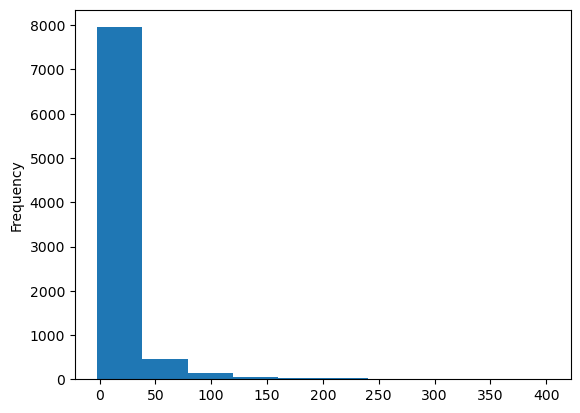

In [109]:
# quick way to use pandas built-in matplotlib functions for histograms
pvt_df.NO.plot.hist()

<AxesSubplot: >

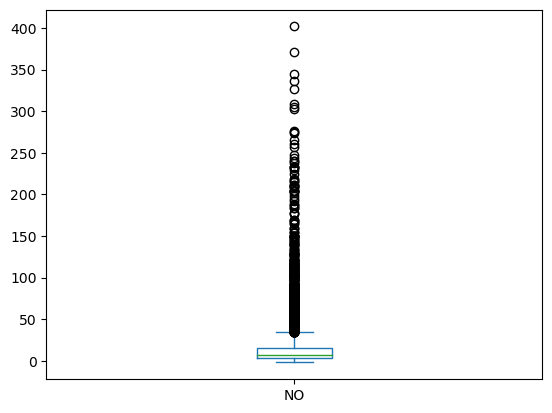

In [110]:
# quick way to use pandas built-in matplotlib functions for histograms
pvt_df.NO.plot.box()


##### Excercise 5 

We will continue working with LaqnData.csv. 

    a)	Run the following code, see its output, and then study the code to answer what each line of this code does.

In [129]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00
...,...,...,...,...,...
43795,PM2.5,-2.0,31,12,19:00
43796,PM2.5,6.0,31,12,20:00
43797,PM2.5,5.0,31,12,21:00
43798,PM2.5,5.0,31,12,22:00


Answer: 

---
1) imports the pandas library  
1) creates a dataframe from the csv 'LaqnData.csv' file  
1) drops 4 columns from the dataframe  
1) creates a new dataframe 'datetime' from the ReadingDateTime column by splitting where the values have spaces
1) names the columes in the 'datetime' dataframe 'Date' and 'Time'
1) creates a new dataframe 'date_df' from the 'Date' column by splitting where the values have a '/'
1) names the columes in the 'date_df' dataframe 'Day', 'Month', 'Year' 
1) creates a new dataframe 'air_df' by joining the dataframes 'date_df' with datetime_df and dropping the "ReadingDateTime" column and the "Year" columns
1) pretty prints the resulting dataframe


**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*



    b)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [130]:
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df


Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

Answer:

---
The set_index function is used here to make a multi-index that is made of 'Month', 'Day', 'Time', and 'Species'.

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

    c)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [133]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Answer:

---

unstack changes the last two columns from being long to being wide

**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*

    d)	Compare the output of the code above with pvt_df from Exercise 4. Are they basically the same?
    e)	Explain what are the differences and similarities between the pair .melt()/.pivot() and the pair .stack()/.unstack()? 
    f)	If you were to choose one counterpart for .melt() between .stack()/.unstack() which one would you choose?

Answer:



---
d) The main difference is that the unstack has a multi index, but they are eqivelent in terms of data that they convey and how it is displayed.  
e) stack/unstack are quick and easy, but provide less control than pivot/melt  
f) melt and stack make wide data long; pivot and unstack make long data wide  


**Note:** *When you are asked to respond to a question using words and not code, you should make use of the features of 
[markdown](https://www.markdownguide.org/cheat-sheet/) to have the ablity to format your text.*